In [340]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("data.csv")
data=data.dropna()
data

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,no,no,4,3,4,1,1,3,6,D
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,yes,no,5,3,3,1,1,3,4,D
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,yes,no,4,3,2,2,3,3,10,C
3,3,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,3,2,2,1,1,5,2,B
4,4,GP,F,16,U,GT3,T,3,3,other,...,no,no,4,3,2,1,2,5,4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,378,MS,F,18,U,GT3,T,3,3,other,...,yes,yes,4,1,3,1,2,1,0,B
379,379,MS,F,17,R,GT3,T,3,1,at_home,...,yes,no,4,5,4,2,3,1,17,C
380,380,MS,M,18,U,GT3,T,4,4,teacher,...,yes,no,3,2,4,1,4,2,4,B
381,381,MS,M,18,R,GT3,T,2,1,other,...,yes,yes,4,4,3,1,3,5,5,D


In [341]:
"""
    This dataset has issue. MS School is undersampled. 
"""
data.groupby("school").school.count()

school
GP    315
MS     33
Name: school, dtype: int64

In [342]:
ms=data.loc[data.school=="MS"]
gp=data.loc[data.school=="GP"]
sampled_gp=gp.sample(33)

sampled_balanced_data=pd.concat([ms,sampled_gp]).reset_index()
data=sampled_balanced_data

In [343]:
import seaborn as sns

In [344]:

#Creating category as cartesian product of school-gender
ms_male=data.loc[(data.school=="MS") & (data.sex=="M")].reset_index()
ms_female=data.loc[(data.school=="MS") & (data.sex=="F")].reset_index()
gp_male=data.loc[(data.school=="GP") & (data.sex=="M")].reset_index()
gp_female=data.loc[(data.school=="GP") & (data.sex=="F")].reset_index()
ms_male["school_gender"]="MS-M"
ms_female["school_gender"]="MS-F"
gp_male["school_gender"]="GP-M"
gp_female["school_gender"]="GP-F"


data=pd.concat([ms_male,ms_female,gp_male,gp_female])

<AxesSubplot:xlabel='school_gender', ylabel='count'>

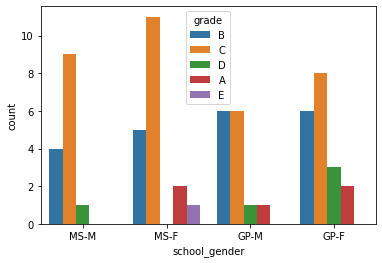

In [345]:
sns.countplot(x="school_gender",hue='grade',data=data)

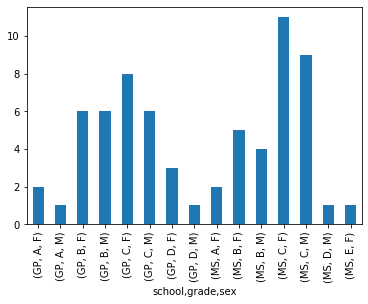

In [346]:
x=data.groupby(['school','grade','sex']).sex.count().plot.bar()

In [347]:
grade_ab=data.loc[(data.grade=="A") | (data.grade=="B")]
grade_cd=data.loc[(data.grade=="C") | (data.grade=="D")]
grade_e=data.loc[(data.grade=="E")]

grade_ab["grade_category"]="AB"
grade_cd["grade_category"]="CD"
grade_e["grade_category"]="E"
data=pd.concat([grade_ab,grade_cd,grade_e])
average_study_time=data.groupby("grade_category").studytime.mean()

<ipython-input-347-0a581e0e6d48>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grade_ab["grade_category"]="AB"
<ipython-input-347-0a581e0e6d48>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grade_cd["grade_category"]="CD"
<ipython-input-347-0a581e0e6d48>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [348]:
data.groupby("grade_category").grade_category.count()

grade_category
AB    26
CD    39
E      1
Name: grade_category, dtype: int64

In [349]:
average_study_time

grade_category
AB    2.153846
CD    2.076923
E     1.000000
Name: studytime, dtype: float64

<AxesSubplot:xlabel='famsize,grade'>

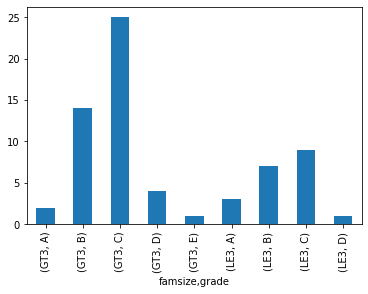

In [350]:
data.groupby(['famsize','grade']).count()["index"].plot.bar()


In [351]:
data['Pedu'] = data.apply(lambda x: (x["Medu"]+ x["Fedu"])/8,axis=1)
data['Pedu']

0     0.625
2     0.750
9     1.000
11    1.000
1     1.000
      ...  
13    0.750
14    0.500
15    0.500
16    0.625
12    0.375
Name: Pedu, Length: 66, dtype: float64

<function IPython.core.display.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, **kwargs)>

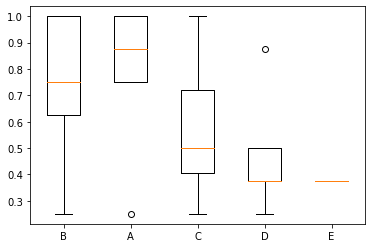

In [352]:

datapoints = []
labels=data['grade'].unique()
for c in labels:
    datapoints.append(data.loc[data.grade==c,'Pedu'])
plt.boxplot(datapoints,labels=labels)
display

convert grade to numeric \\
corellation matrix \\
biggest? \\


In [353]:
mappings={"grade":{"A":5,"B":4,"C":3,"D":2,"E":1}}
data=data.replace(mappings)

In [363]:
bad_grades = data.corr()["grade"].sort_values()[:3]
good_grades = data.corr()["grade"].sort_values()[-5:-1]

In [356]:
bad_grades

traveltime   -0.230319
Walc         -0.221261
absences     -0.217952
Name: grade, dtype: float64

In [364]:
good_grades

studytime    0.216986
Fedu         0.349496
Medu         0.393533
Pedu         0.419606
Name: grade, dtype: float64